In [15]:
import carla
import sys
import glob
import os
from Utils.Util_functions import distance
sys.path.append("../../carla9.13/PythonAPI/carla/")
# sys.path.append(glob.glob("/Navigation/Utils*"))
# from agents.navigation.behavior_agent import BehaviorAgent
from Controller import VehiclePIDController
# print(client.get_available_maps())
client = carla.Client("localhost",2000)
client.set_timeout(20.0)
world = client.get_world()
print(world)
world = client.load_world('Town06')
vehicle_blueprints = world.get_blueprint_library().filter("cybertruck")
spawn_points = world.get_map().get_spawn_points()
ego_vehicle = world.spawn_actor(vehicle_blueprints[0],spawn_points[196])     #SPWAN POINTS TO BE CONSIDERED  60,61,62,63. #195 +ve x
ego_vehicle.set_transform(world.get_map().get_waypoint(ego_vehicle.get_location()).next(75)[0].transform)
spectator = world.get_spectator()
transform = ego_vehicle.get_transform()
spectator.set_transform(carla.Transform(transform.location + carla.Location(x=5,y=0,z=3),
carla.Rotation(pitch=-20,yaw = 0)))

World(id=13719783247517638853)


In [10]:
from Utils.misc import get_speed
map = world.get_map()
current_waypoint = map.get_waypoint(carla.Location(ego_vehicle.get_transform().get_forward_vector()*get_speed(ego_vehicle)/3.6) + ego_vehicle.get_location())
print(current_waypoint)
b = ego_vehicle.get_location()
a = carla.Vector3D(x=455.2796, y=-17, z = 0)
c = ego_vehicle.get_transform().get_right_vector()
print(c)
print(50*c.y)
print((a-b).dot(c))

Waypoint(Transform(Location(x=366.216278, y=144.429977, z=0.000000), Rotation(pitch=0.000000, yaw=0.234757, roll=0.000000)))
Vector3D(x=-0.004097, y=0.999992, z=-0.000000)
49.99957978725433
-161.7935333251953


0.125
0.125


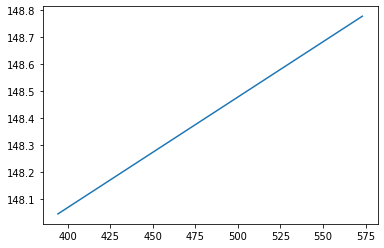

In [22]:
e_wpt = world.get_map().get_waypoint(ego_vehicle.get_location())

# print(e_wpt.left_lane_marking - e_wpt.right_lane_marking)
x=[]
y=[]
for i in range(180):
    x.append(e_wpt.next(1)[0].transform.location.x)
    y.append(e_wpt.next(1)[0].transform.location.y)
    e_wpt = e_wpt.next(1)[0]
import matplotlib.pyplot as plt

plt.plot(x,y)
plt.show()


nigga


In [6]:
control = carla.VehicleControl(throttle = 0.3)
ego_vehicle.apply_control(control)

In [16]:
map = world.get_map()
e_wpt = map.get_waypoint(ego_vehicle.get_location())
print(e_wpt)
print(e_wpt.get_right_lane().transform.location.y)


Waypoint(Transform(Location(x=533.651978, y=-17.373524, z=0.000000), Rotation(pitch=0.000000, yaw=-179.874878, roll=0.000000)))
-20.873516082763672


In [3]:
ego_vehicle.destroy()

True